# Gentrification in Brooklyn, New York City

# Introduction 

# What is Gentrification?

- Gentrification is the process of a low income and sometimes crime-ridden urban area transforming into a more upscale and affluent area gentrification is usually initiated by affluent residents and businesses moving into an area that is accompanied by the renovation and reconstruction of buildings parks and other local amenities, it involves both, economic and demographic change into change in the overall make up of the people who live in the area as the area improves and becomes more desirable property values rents in the cost of living will also become more expensive. 

- Gentrification can result in displacing residents who may have lived in the area their entire life but all of a sudden are unable to afford the higher cost of living, forcing them to move.

- Gentrification is somewhat of a controversial subject in most cases the areas that experience gentrification are initially low income minority communities and as the area improves and prices increase, it's the more educated and affluent residents that tend to benefit from the change because these residents are the ones who can actually afford the stay, it's the less educated lower-income households that are negatively impacted by gentrification.

- Gentrification does not occur in every urban city and it usually doesn't happen in the poorest most dangerous neighborhoods either, typically there needs to be some kind of cultural opportunity in order for gentrification to occur



# Data Sources

- The following web maps utilize real estate sales data sourced from the New York City Department of Finance (DOF). We have converted this CSV file into a DOF.geojson file. The dataset, titled "Summary of Neighborhood Sales by Neighborhood Citywide by Borough" (filename: DOF__Summary_of_Neighborhood_Sales_by_Neighborhood_Citywide_by_Borough_20250304.csv), provides a borough-level overview of residential property sales.

- The data includes the following fields: borough, neighborhood, type of home (one-family, two-family, or three-family), number of sales, lowest sale price, average sale price, median sale price, highest sale price, and year. The data spans the years 2010-2021 (and a handful of listings in 2022), offering a temporal view of sales trends.

- We have used an API which is decribed in the next section and using this API we have created a brooklyn.geojson file that contains all the info about the city of brooklyn.


# API Functioning 

- API endpoint - (https://data.cityofnewyork.us/resource/9nt8-h7nd.geojson)

- The following API provides with a geojson file with the following columns

 "type": Specifies that the dataset is a "FeatureCollection," containing multiple geographical features.
 "name": Indicates the name of the dataset, in this case, "brooklyn."
 "crs": Refers to the Coordinate Reference System, which is "CRS84" for this dataset.
 "features": An array of geographical features, each with its own properties and geometry.
 "shape_area": The area of the feature (Greenpoint), measured in square units.
 "ntaname": The name of the Neighborhood Tabulation Area .
 "cdtaname": The name of the community district equivalent.
 "shape_leng": The length of the feature’s boundary in meters.
 "boroname": The name of the borough, which is "Brooklyn."
 "ntatype": The type of the NTA, where "0" typically indicates a standard neighborhood.
 "nta2020": The 2020 Census identifier for the NTA.
 "borocode": The numeric code for the borough, where Brooklyn has the code "3."
 "countyfips": The FIPS code for the county, with "047" representing Kings County (Brooklyn).
 "ntaabbrev": The abbreviated name of the NTA.
 "cdta2020": The 2020 Census identifier for the Community District Tabulation Area.
 "geometry": Defines the geometric shape of the feature, such as a MultiPolygon, with specific boundary coordinates.


In [1]:
#importing all the necessary libraries that may be needed
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import osmnx as ox
import contextily as ctx
import seaborn as sns

In [2]:
import requests
#requests is a python library that enables us to fetch data from an external API


url = "https://data.cityofnewyork.us/resource/9nt8-h7nd.geojson"

response = requests.get(url)
#GET requets to the API to fetch the data

if response.status_code == 200:
    with open("nyc__boundary.geojson", "wb") as file:
        file.write(response.content)
    print("nyc file downloaded successfully.")
else:
    print("Failed to download the GeoJSON file.")

nyc file downloaded successfully.


In [24]:
nyc_gdf=gpd.read_file("nyc__boundary.geojson")# convertign to a geo df
# print("Loaded NYC data")
# print(nyc_gdf.head())

# Filtering the nyc gdf to get only Brooklyn neighborhoods
brooklyn_gdf = nyc_gdf[nyc_gdf["boroname"] == "Brooklyn"]
# print(brooklyn_gdf.head())

# Save as a new GeoJSON
brooklyn_gdf.to_file("brooklyn.geojson", driver="GeoJSON")
# print("Filtered Brooklyn data")


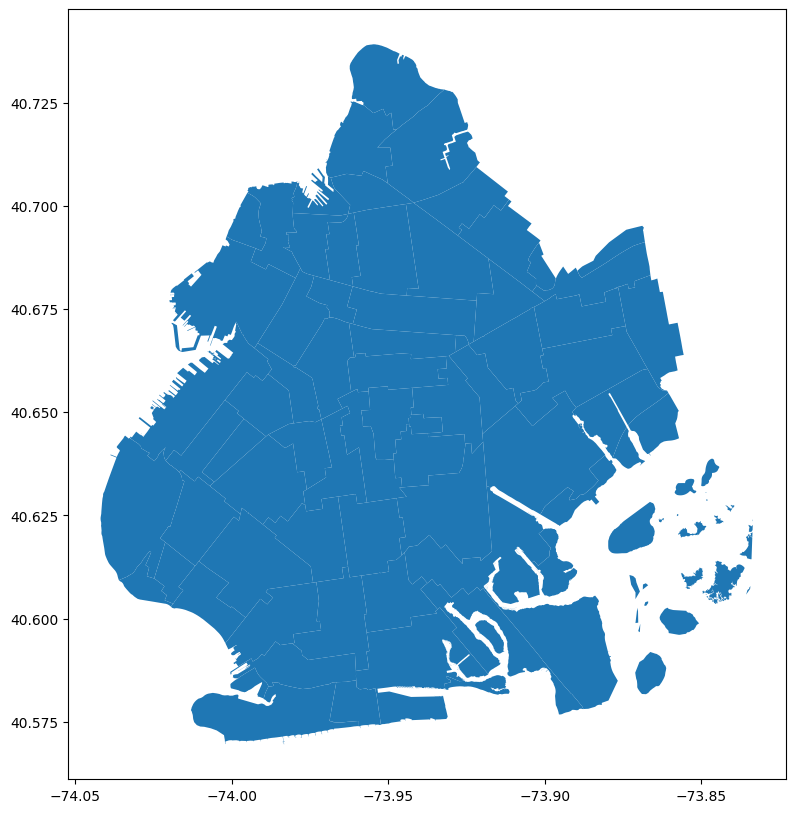

In [67]:
# Now using the brooklyn geojson file to plot the map
brooklyn_boundary = gpd.read_file("brooklyn.geojson")

#Showing the brooklyn boundries on a static map
brooklyn_boundary.plot( figsize=(10, 10))
plt.show()
# print("Plotted Brooklyn boundary")

In [88]:
# Loading the housing prices dataset,, this dataset was obtained from the NYC open data API
# path = "DOF__Summary_of_Neighborhood_Sales_by_Neighborhood_Citywide_by_Borough_20250304.csv"
path = "Brooklynold.csv"
housing_prices_df = pd.read_csv(path)
brooklyn_df=housing_prices_df

# print("Loaded housing prices data from NYC open data API")


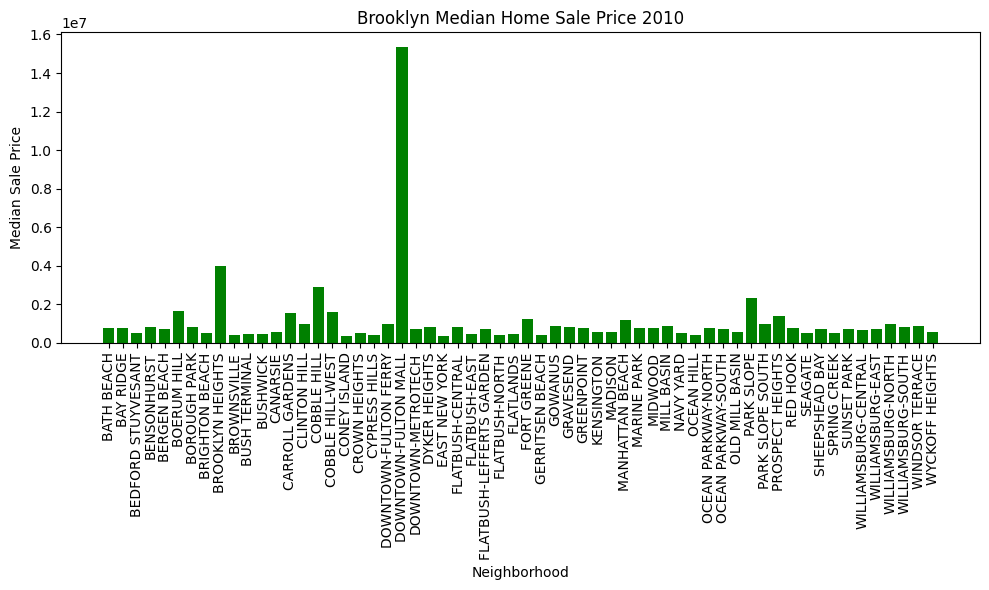

In [89]:
import json

# Loading the GeoJSON file
with open("DOF.geojson", "r") as f:
    data = json.load(f)

# Creating a Pandas DataFrame from the GeoJSON data
df = pd.DataFrame([feature["properties"] for feature in data["features"]])

# Filter for Brooklyn data and handle geometry (even though it's null)
df_brooklyn = df[(df["BOROUGH"] == "BROOKLYN") & (df["MEDIAN SALE PRICE"].notna())]

# Convert the filtered DataFrame to a GeoDataFrame (even without geometry)
gdf_brooklyn = geopandas.GeoDataFrame(df_brooklyn, geometry=None)  # Specify no geometry

gdf_brooklyn_2010 = gdf_brooklyn[gdf_brooklyn["YEAR"] == 2010]



plt.figure(figsize=(10, 6))
plt.bar(gdf_brooklyn_2010["NEIGHBORHOOD"], gdf_brooklyn_2010["MEDIAN SALE PRICE"], color="green")
plt.xlabel("Neighborhood")
plt.ylabel("Median Sale Price")
plt.title("Brooklyn Median Home Sale Price 2010")
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()


- The diagram above shows the house pricing(million USD) in Brooklyn in the year 2010.
- Now we will compare the house pricing of the same area in the year 2016. 

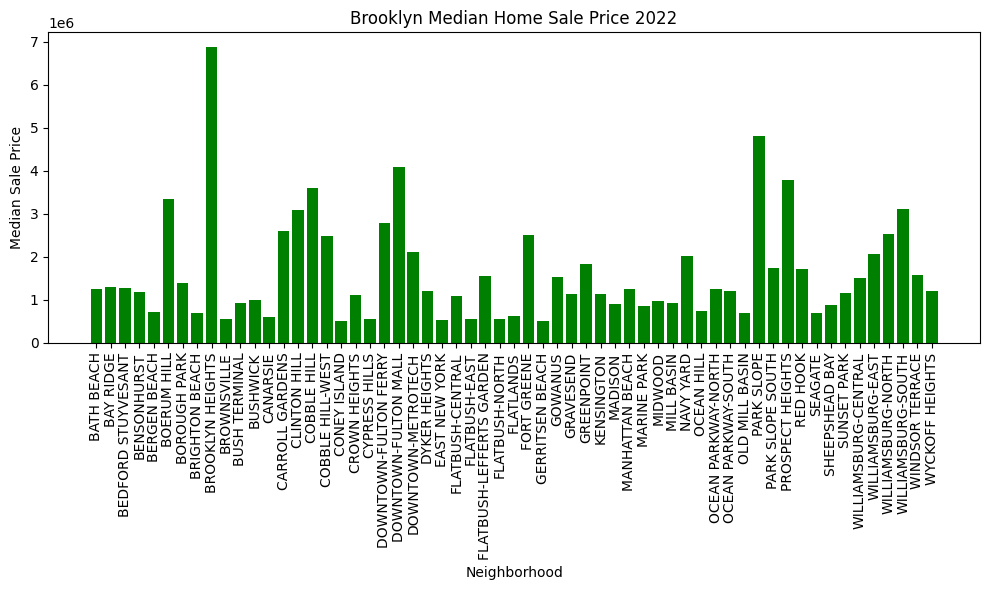

In [94]:

gdf_brooklyn_2016 = gdf_brooklyn[gdf_brooklyn["YEAR"] == 2016]

plt.figure(figsize=(10, 6))
plt.bar(gdf_brooklyn_2016["NEIGHBORHOOD"], gdf_brooklyn_2016["MEDIAN SALE PRICE"], color="green")
plt.xlabel("Neighborhood")
plt.ylabel("Median Sale Price")# in MILLIONS USD
plt.title("Brooklyn Median Home Sale Price 2022")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


- From the above diagram , we can clearly see that almost all the major areas of Brooklyn have gone through gentrification, therby indicating that housing prices have dramatically increased in just few years.

In [112]:


# Loading the housing prices dataset
df = pd.read_csv("DOF__Summary_of_Neighborhood_Sales_by_Neighborhood_Citywide_by_Borough_20250304.csv")

# Rename columns for easier access, as all the names were in Capital letters
df.rename(columns={'BOROUGH': 'Borough', 'NEIGHBOURHOOD': 'Neighborhood', 'TYPE OF HOME': 'Type of Home', 
                   'NUMBER OF SALES': 'Number of Sales', 'LOWEST SALE PRICE': 'Lowest Sale Price', 
                   'AVERAGE SALE PRICE': 'Average Sale Price', 'MEDIAN SALE PRICE': 'Median Sale Price',
                   'HIGHEST SALE PRICE': 'Highest Sale Price', 'YEAR': 'Year'}, inplace=True)

# Convert Year to datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Calculate Sales Density (sales per year per neighborhood) - I was confused here and took help 
sales_summary = df.groupby(['Year', 'Borough', 'Neighborhood'])['Number of Sales'].sum().reset_index()

# Normalization of Sales Density to make the animation clear becauase it will bring the range in between 0 to 1
def normalize_data(df, column):
    min_val = df[column].min()
    max_val = df[column].max()
    df[column] = (df[column] - min_val) / (max_val - min_val)
    return df

sales_summary = normalize_data(sales_summary, 'Number of Sales')


#No such geojson was found so I had to create one, I used the hosuing data from NYC open data API and the geojson file from the NYC open data API
def create_geojson_features(df):
    
    features = []
    for _, row in df.iterrows():
        feature = {
            'type': 'Feature',
            'geometry': {
                'type': 'Point', 
                'coordinates': get_coordinates(row['Borough'], row['Neighborhood'])  # Get Coordinates

            },
            'properties': {
                'times': [row['Year'].strftime('%Y-%m-%d %H:%M:%S')],
                'popup': f"Year: {row['Year'].year}<br>Neighborhood: {row['Neighborhood']}<br>Borough: {row['Borough']}<br>Sales: {row['Number of Sales']:.2f}",
                'style': {'color': 'red', 'weight': row['Number of Sales'] * 3, 'radius': row['Number of Sales'] * 5}, # Adjust for scaling
                'icon': 'circle',
                'iconstyle': {
                    'fillColor': "red", 
                    'fillOpacity': 0.8,   
                    'stroke': 'false',
                }

            }
        }
        features.append(feature)
    return features


#Hardcoded the coordinates of the neighborhoods in Brooklyn, Queens and Staten Island because the data was not availble along with housign prices, so did it manually
def get_coordinates(borough, neighborhood):
    coordinate_data = {
    ('BROOKLYN', 'BATH BEACH'): [-73.9946, 40.5968],
    ('BROOKLYN', 'BAY RIDGE'): [-74.0306, 40.6247],
    ('BROOKLYN', 'BEDFORD STUYVESANT'): [-73.9417, 40.6883],
    ('BROOKLYN', 'BENSONHURST'): [-73.9854, 40.6078],
    ('BROOKLYN', 'BERGEN BEACH'): [-73.8883, 40.6181],
    ('BROOKLYN', 'BOERUM HILL'): [-73.9907, 40.6850],
    ('BROOKLYN', 'BOROUGH PARK'): [-73.9937, 40.6327],
    ('BROOKLYN', 'BRIGHTON BEACH'): [-73.9618, 40.5768],
    ('BROOKLYN', 'BROOKLYN HEIGHTS'): [-73.9941, 40.6943],
    ('BROOKLYN', 'BROWNSVILLE'): [-73.9156, 40.6634],
    ('BROOKLYN', 'BUSH TERMINAL'): [-74.0087, 40.6506],
    ('BROOKLYN', 'BUSHWICK'): [-73.9214, 40.7000],
    ('BROOKLYN', 'CANARSIE'): [-73.8977, 40.6370],
    ('BROOKLYN', 'CARROLL GARDENS'): [-73.9949, 40.6814],
    ('BROOKLYN', 'CLINTON HILL'): [-73.9680, 40.6922],
    ('BROOKLYN', 'COBBLE HILL'): [-73.9974, 40.6869],
    ('BROOKLYN', 'COBBLE HILL-WEST'): [-73.9974, 40.6869],
    ('BROOKLYN', 'CONEY ISLAND'): [-73.9835, 40.5771],
    ('BROOKLYN', 'CROWN HEIGHTS'): [-73.9515, 40.6673],
    ('BROOKLYN', 'CYPRESS HILLS'): [-73.8833, 40.6883],
    ('BROOKLYN', 'DOWNTOWN-FULTON FERRY'): [-73.9905, 40.7031],
    ('BROOKLYN', 'DOWNTOWN-FULTON MALL'): [-73.9879, 40.6923],
    ('BROOKLYN', 'DOWNTOWN-METROTECH'): [-73.9879, 40.6923],
    ('BROOKLYN', 'DYKER HEIGHTS'): [-74.0118, 40.6247],
    ('BROOKLYN', 'EAST NEW YORK'): [-73.8812, 40.6706],
    ('BROOKLYN', 'FLATBUSH-CENTRAL'): [-73.9618, 40.6344],
    ('BROOKLYN', 'FLATBUSH-EAST'): [-73.9404, 40.6508],
    ('BROOKLYN', 'FLATBUSH-LEFFERTS GARDEN'): [-73.9531, 40.6577],
    ('BROOKLYN', 'FLATBUSH-NORTH'): [-73.9731, 40.6452],
    ('BROOKLYN', 'FLATLANDS'): [-73.9182, 40.6317],
    ('BROOKLYN', 'FORT GREENE'): [-73.9743, 40.6900],
    ('BROOKLYN', 'GERRITSEN BEACH'): [-73.9244, 40.5870],
    ('BROOKLYN', 'GOWANUS'): [-73.9971, 40.6714],
    ('BROOKLYN', 'GRAVESEND'): [-73.9771, 40.5978],
    ('BROOKLYN', 'GREENPOINT'): [-73.9528, 40.7276],
    ('BROOKLYN', 'KENSINGTON'): [-73.9736, 40.6406],
    ('BROOKLYN', 'MADISON'): [-73.9656, 40.6081],
    ('BROOKLYN', 'MANHATTAN BEACH'): [-73.9579, 40.5771],
    ('BROOKLYN', 'MARINE PARK'): [-73.9396, 40.6099],
    ('BROOKLYN', 'MIDWOOD'): [-73.9682, 40.6181],
    ('BROOKLYN', 'MILL BASIN'): [-73.9133, 40.6205],
    ('BROOKLYN', 'NAVY YARD'): [-73.9743, 40.6900],
    ('BROOKLYN', 'OCEAN HILL'): [-73.9156, 40.6634],
    ('BROOKLYN', 'OCEAN PARKWAY-NORTH'): [-73.9682, 40.6181],
    ('BROOKLYN', 'OCEAN PARKWAY-SOUTH'): [-73.9682, 40.6181],
    ('BROOKLYN', 'OLD MILL BASIN'): [-73.9094, 40.6156],
    ('BROOKLYN', 'PARK SLOPE'): [-73.9837, 40.6729],
    ('BROOKLYN', 'PARK SLOPE SOUTH'): [-73.9837, 40.6729],
    ('BROOKLYN', 'PROSPECT HEIGHTS'): [-73.9622, 40.6788],
    ('BROOKLYN', 'RED HOOK'): [-74.0134, 40.6794],
    ('BROOKLYN', 'SEAGATE'): [-74.0025, 40.5777],
    ('BROOKLYN', 'SHEEPSHEAD BAY'): [-73.9586, 40.5908],
    ('BROOKLYN', 'SPRING CREEK'): [-73.8638, 40.6611],
    ('BROOKLYN', 'SUNSET PARK'): [-74.0048, 40.6458],
    ('BROOKLYN', 'WILLIAMSBURG-CENTRAL'): [-73.9606, 40.7140],
    ('BROOKLYN', 'WILLIAMSBURG-EAST'): [-73.9519, 40.7130],
    ('BROOKLYN', 'WILLIAMSBURG-NORTH'): [-73.9599, 40.7181],
    ('BROOKLYN', 'WILLIAMSBURG-SOUTH'): [-73.9579, 40.7074],
    ('BROOKLYN', 'WINDSOR TERRACE'): [-73.9840, 40.6626],
    ('BROOKLYN', 'WYCKOFF HEIGHTS'): [-73.9327, 40.7004],
    ('QUEENS', 'AIRPORT LA GUARDIA'): [-73.8677, 40.7743],
    ('QUEENS', 'ARVERNE'): [-73.8028, 40.5994],
    ('QUEENS', 'ASTORIA'): [-73.9212, 40.7685],
    ('QUEENS', 'BAYSIDE'): [-73.7745, 40.7674],
    ('QUEENS', 'BEECHHURST'): [-73.7847, 40.7967],
    ('QUEENS', 'BELLE HARBOR'): [-73.8472, 40.5797],
    ('QUEENS', 'BELLEROSE'): [-73.7364, 40.7285],
    ('QUEENS', 'BRIARWOOD'): [-73.8274, 40.7115],
    ('QUEENS', 'BROAD CHANNEL'): [-73.8292, 40.6293],
    ('QUEENS', 'CAMBRIA HEIGHTS'): [-73.7574, 40.6759],
    ('QUEENS', 'COLLEGE POINT'): [-73.8383, 40.7811],
    ('QUEENS', 'CORONA'): [-73.8512, 40.7471],
    ('QUEENS', 'DOUGLASTON'): [-73.7583, 40.7639],
    ('QUEENS', 'EAST ELMHURST'): [-73.8677, 40.7743],
    ('QUEENS', 'ELMHURST'): [-73.8654, 40.7347],
    ('QUEENS', 'FAR ROCKAWAY'): [-73.7579, 40.5821],
    ('QUEENS', 'FLORAL PARK'): [-73.7397, 40.7378],
    ('QUEENS', 'FLUSHING-NORTH'): [-73.8180, 40.7664],
    ('QUEENS', 'FLUSHING-SOUTH'): [-73.8180, 40.7664],
    ('QUEENS', 'FOREST HILLS'): [-73.8472, 40.7253],
    ('QUEENS', 'FRESH MEADOWS'): [-73.7989, 40.7418],
    ('QUEENS', 'GLEN OAKS'): [-73.7158, 40.7569],
    ('QUEENS', 'GLENDALE'): [-73.8736, 40.7030],
    ('QUEENS', 'HAMMELS'): [-73.8122, 40.5864],
    ('QUEENS', 'HILLCREST'): [-73.7986, 40.7205],
    ('QUEENS', 'HOLLIS'): [-73.7525, 40.7074],
    ('QUEENS', 'HOLLIS HILLS'): [-73.7705, 40.7464],
    ('QUEENS', 'HOLLISWOOD'): [-73.7600, 40.7342],
    ('QUEENS', 'HOWARD BEACH'): [-73.8342, 40.6528],
    ('QUEENS', 'JACKSON HEIGHTS'): [-73.8856, 40.7525],
    ('QUEENS', 'JAMAICA'): [-73.7900, 40.6900],
    ('QUEENS', 'JAMAICA BAY'): [-73.7705, 40.5821],
    ('QUEENS', 'JAMAICA ESTATES'): [-73.7825, 40.7048],
    ('QUEENS', 'JAMAICA HILLS'): [-73.7825, 40.7048],
    ('QUEENS', 'KEW GARDENS'): [-73.8312, 40.7125],
    ('QUEENS', 'LAURELTON'): [-73.7352, 40.6776],
    ('QUEENS', 'LITTLE NECK'): [-73.7496, 40.7692],
    ('QUEENS', 'LONG ISLAND CITY'): [-73.9414, 40.7443],
    ('QUEENS', 'MASPETH'): [-73.8878, 40.7243],
    ('QUEENS', 'MIDDLE VILLAGE'): [-73.8722, 40.7188],
    ('QUEENS', 'NEPONSIT'): [-73.8627, 40.5667],
    ('QUEENS', 'OAKLAND GARDENS'): [-73.7765, 40.7476],
    ('QUEENS', 'OZONE PARK'): [-73.8302, 40.6783],
    ('QUEENS', 'QUEENS VILLAGE'): [-73.7208, 40.7131],
    ('QUEENS', 'QUEENS-UNKNOWN'): [-73.8292, 40.6293],
    ('QUEENS', 'REGO PARK'): [-73.8596, 40.7230],
    ('QUEENS', 'RICHMOND HILL'): [-73.8274, 40.6972],
    ('QUEENS', 'RIDGEWOOD'): [-73.9083, 40.7033],
    ('QUEENS', 'ROCKAWAY PARK'): [-73.8531, 40.5747],
    ('QUEENS', 'ROSEDALE'): [-73.7409, 40.6611],
    ('QUEENS', 'SO. JAMAICA-BAISLEY PARK'): [-73.7900, 40.6700],
    ('QUEENS', 'SOUTH JAMAICA'): [-73.7900, 40.6700],
    ('QUEENS', 'SOUTH OZONE PARK'): [-73.8229, 40.6729],
    ('QUEENS', 'SPRINGFIELD GARDENS'): [-73.7584, 40.6584],
    ('QUEENS', 'ST. ALBANS'): [-73.7484, 40.6924],
    ('QUEENS', 'SUNNYSIDE'): [-73.9262, 40.7448],
    ('QUEENS', 'WHITESTONE'): [-73.8073, 40.7846],
    ('QUEENS', 'WOODHAVEN'): [-73.8669, 40.6955],
    ('QUEENS', 'WOODSIDE'): [-73.9028, 40.7456],
      ('STATEN ISLAND', 'ANNADALE'): [-74.1605, 40.5425],
      ('STATEN ISLAND', 'ARDEN HEIGHTS'): [-74.1383, 40.5667],
      ('STATEN ISLAND', 'ARROCHAR'): [-74.0806, 40.6003],
      ('STATEN ISLAND', 'ARROCHAR-SHORE ACRES'): [-74.0733, 40.6067],
      ('STATEN ISLAND', 'BULLS HEAD'): [-74.1483, 40.6003],
      ('STATEN ISLAND', 'CASTLETON CORNERS'): [-74.1067, 40.6167],
      ('STATEN ISLAND', 'CLOVE LAKES'): [-74.0861, 40.6225],
      ('STATEN ISLAND', 'CONCORD'): [-74.0806, 40.6003],
      ('STATEN ISLAND', 'CONCORD-FOX HILLS'): [-74.0778, 40.5972],
      ('STATEN ISLAND', 'DONGAN HILLS'): [-74.1000, 40.5833],
      ('STATEN ISLAND', 'DONGAN HILLS-COLONY'): [-74.0904, 40.5844],
      ('STATEN ISLAND', 'DONGAN HILLS-OLD TOWN'): [-74.0762, 40.5904],
      ('STATEN ISLAND', 'ELTINGVILLE'): [-74.1500, 40.5500],
      ('STATEN ISLAND', 'EMERSON HILL'): [-74.0855, 40.6050],
      ('STATEN ISLAND', 'GRANT CITY'): [-74.0936, 40.5886],
      ('STATEN ISLAND', 'GRASMERE'): [-74.0833, 40.6000],
      ('STATEN ISLAND', 'GREAT KILLS'): [-74.1469, 40.5553],
      ('STATEN ISLAND', 'GREAT KILLS-BAY TERRACE'): [-74.1262, 40.5575],
      ('STATEN ISLAND', 'GRYMES HILL'): [-74.0972, 40.6111],
      ('STATEN ISLAND', 'HUGUENOT'): [-74.1772, 40.5417],
      ('STATEN ISLAND', 'LIVINGSTON'): [-74.1083, 40.6333],
      ('STATEN ISLAND', 'MANOR HEIGHTS'): [-74.1111, 40.5972],
      ('STATEN ISLAND', 'MARINERS HARBOR'): [-74.1722, 40.6389],
      ('STATEN ISLAND', 'MIDLAND BEACH'): [-74.0778, 40.5778],
      ('STATEN ISLAND', 'NEW BRIGHTON'): [-74.0700, 40.6261],
      ('STATEN ISLAND', 'NEW DORP'): [-74.1167, 40.5750],
      ('STATEN ISLAND', 'NEW DORP-BEACH'): [-74.1167, 40.5750],
      ('STATEN ISLAND', 'NEW DORP-HEIGHTS'): [-74.1167, 40.5750],
      ('STATEN ISLAND', 'NEW SPRINGVILLE'): [-74.1333, 40.5917],
      ('STATEN ISLAND', 'OAKWOOD'): [-74.1250, 40.5684],
      ('STATEN ISLAND', 'OAKWOOD-BEACH'): [-74.1167, 40.5750],
      ('STATEN ISLAND', 'PLEASANT PLAINS'): [-74.1762, 40.5405],
      ('STATEN ISLAND', 'PORT IVORY'): [-74.1889, 40.6333],
      ('STATEN ISLAND', 'PORT RICHMOND'): [-74.1278, 40.6333],
      ('STATEN ISLAND', 'PRINCES BAY'): [-74.1806, 40.5400],
      ('STATEN ISLAND', 'RICHMONDTOWN'): [-74.1067, 40.5967],
      ('STATEN ISLAND', 'RICHMONDTOWN-LIGHTHS HILL'): [-74.1194, 40.6000],
      ('STATEN ISLAND', 'ROSEBANK'): [-74.0761, 40.6156],
      ('STATEN ISLAND', 'ROSSVILLE'): [-74.1936, 40.5528],
      ('STATEN ISLAND', 'ROSSVILLE-CHARLESTON'): [-74.1889, 40.5472],
      ('STATEN ISLAND', 'ROSSVILLE-RICHMOND VALLEY'): [-74.1772, 40.5417],
      ('STATEN ISLAND', 'SILVER LAKE'): [-74.0917, 40.6250],
      ('STATEN ISLAND', 'SOUTH BEACH'): [-74.0743, 40.5858],
      ('STATEN ISLAND', 'STAPLETON'): [-74.0674, 40.6235],
      ('STATEN ISLAND', 'STAPLETON-CLIFTON'): [-74.0748, 40.6173],
      ('STATEN ISLAND', 'STATEN ISLAND-UNKNOWN'): [-74.1333, 40.5917],
      ('STATEN ISLAND', 'SUNNYSIDE'): [-74.0761, 40.6156],
      ('STATEN ISLAND', 'TODT HILL'): [-74.1028, 40.5861],
      ('STATEN ISLAND', 'TOMPKINSVILLE'): [-74.0708, 40.6208],
      ('STATEN ISLAND', 'TOTTENVILLE'): [-74.2540, 40.5127],
      ('STATEN ISLAND', 'TRAVIS'): [-74.1905, 40.6033],
      ('STATEN ISLAND', 'WEST NEW BRIGHTON'): [-74.0917, 40.6333],
      ('STATEN ISLAND', 'WESTERLEIGH'): [-74.1417, 40.6208],
      ('STATEN ISLAND', 'WILLOWBROOK'): [-74.1111, 40.5972],
      ('STATEN ISLAND', 'WOODROW'): [-74.1900, 40.5381]
    }

    if (borough, neighborhood) in coordinate_data:
      return coordinate_data[(borough, neighborhood)]
    else:
      # Default to Brooklyn coordinates (good for troubleshooting)
      print(f"Warning: Coordinates not found for {borough}, {neighborhood}.  Defaulting to Brooklyn.")
      return [-73.9442, 40.6782] # Brooklyn default



# Filtering for Brooklyn data
brooklyn_sales = sales_summary[sales_summary['Borough'] == 'BROOKLYN'].copy()

geojson_data = {
    'type': 'FeatureCollection',
    'features': create_geojson_features(brooklyn_sales)
}

# Create the map
m = folium.Map(location=[40.65, -73.94], zoom_start=11) # Brooklyn centered

# Creating TimestampedGeoJson object
timestamped_geojson = folium.plugins.TimestampedGeoJson(
    geojson_data,
    period='P1Y', 
    add_last_point=True,
    auto_play=False,
    loop=False,
    max_speed=1,  # Adjusting the speed of the slider
    loop_button=True,
    date_options='YYYY', # Making sure only year is displayed
    time_slider_drag_update=True

)

timestamped_geojson.add_to(m)

display(m)


- If you use the slider and change the years, the red dots will become more significant , indicating the increase in housing prices year by year.

# Conclusion

- This project visualized gentrification trends in Brooklyn through animated maps of housing sales data. 
- The increasing average sale prices, indicated by larger, brighter markers over time, suggest neighborhoods are undergoing significant economic transformation. While further research is needed to confirm direct causation, the visualization highlights areas experiencing rapid price increases, potentially displacing long-term residents and altering neighborhood character. 
- This provides a foundation for policymakers and community stakeholders to investigate specific areas, implement targeted interventions, and promote equitable development within Brooklyn's evolving landscape. A broader data set and more parameters would be required to give further insight

# References

- Freeman, L. (2006). "Gentrification, Displacement and Neighborhood Schools." Journal of the American Planning Association, 72(1), 39-52. [Online]. Available: https://doi.org/10.1080/01944360609523286
(This paper examines the impact of gentrification on neighborhood schools, often a key social institution affected by these changes.)

- Newman, K., & Wyly, E. K. (2006). "The Right to Stay Put, Revisited: Gentrification and Resistance to Displacement in New York City." Urban Studies, 43(1), 23-57. [Online]. Available: https://doi.org/10.1080/00420980500388796
(This paper provides an in-depth case study of gentrification and displacement struggles in New York City. While it does not explicitly use animated maps, it lays a qualitative foundation for understanding the dynamics at play.)

- Atkinson, R. (2000). "Measuring Gentrification and Displacement in Greater London." Urban Studies, 37(1), 149-169. [Online]. Available: https://doi.org/10.1080/0042098002338
(Although focused on London, this provides a framework for operationalizing and measuring gentrification using quantitative indicators.)

- Zuk, K., Bierbaum, A. H., Chapple, K., Gorska, K., & Loukaitou-Sideris, A. (2015). "Gentrification, Displacement, and the Role of Public Investment: A Literature Review." Federal Reserve Bank of San Francisco. [Online]. Available: https://www.frbsf.org/community-development/files/literature-review-gentrification-displacement-public-investment.pdf
(A comprehensive review of literature that connects public investment to the gentrification process, offering context to your data.)

- Davidson, M., & Lees, L. (2005). "New-build 'Gentrification' and London's Riverside Renaissance." Environment and Planning A: Economy and Space, 37(7), 1165-1190. [Online]. Available: https://doi.org/10.1068/a3716
(This study examines new development as a driver of gentrification. Could be useful if your dataset includes information on new construction.)

- Meltzer, R. (2010). "Gentrification and Small Business: Threat or Opportunity?." Journal of Planning Literature, 24(3), 235-248. [Online]. Available: https://doi.org/10.1177/0885412209354958
(This could give you potential indicators for gentrification other than just housing prices). It connects economic change to the small business market)

- Ley, D. (2003). "Artists, aestheticisation and the field of gentrification." Urban Studies, 40(12), 2527-2544. [Online]. Available: https://doi.org/10.1080/0042098032000136192
(Provides a theoretical perspective on the role of cultural and aesthetic factors in gentrification processes).

- Slater, T. (2006). "The eviction of critical perspectives from gentrification research." International Journal of Urban and Regional Research, 30(4), 737-757. [Online]. Available: https://doi.org/10.1111/j.1468-2427.2006.00688.x
(A critical perspective, encouraging careful consideration of displacement and power dynamics in gentrification studies.)